In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### 1. Dataset Structure Analysis

In [3]:
DATA_PATH = '../data/animals/'

classes = sorted([d for d in os.listdir(DATA_PATH)
                  if os.path.isdir(os.path.join(DATA_PATH, d))])

print(f"\nNumber of classes: {len(classes)}")
print(f"Classes: {classes}")


Number of classes: 10
Classes: ['badger', 'bear', 'bee', 'butterfly', 'cat', 'chimpanzee', 'cow', 'crow', 'dog', 'dolphin']


In [5]:
class_counts = {}
all_image_paths = []

for class_name in classes:
    class_path = os.path.join(DATA_PATH, class_name)
    images = [f for f in os.listdir(class_path)
              if f.lower().endswith('.jpg')]
    class_counts[class_name] = len(images)

    for img in images:
        all_image_paths.append({
            'class': class_name,
            'path': os.path.join(class_path, img)
        })

df = pd.DataFrame(all_image_paths)

print(f"\nTotal images in dataset: {len(df)}")
print("\nImages per class:")
for class_name, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {class_name:15s}: {count:5d} images")


Total images in dataset: 600

Images per class:
  badger         :    60 images
  bear           :    60 images
  bee            :    60 images
  butterfly      :    60 images
  cat            :    60 images
  chimpanzee     :    60 images
  cow            :    60 images
  crow           :    60 images
  dog            :    60 images
  dolphin        :    60 images


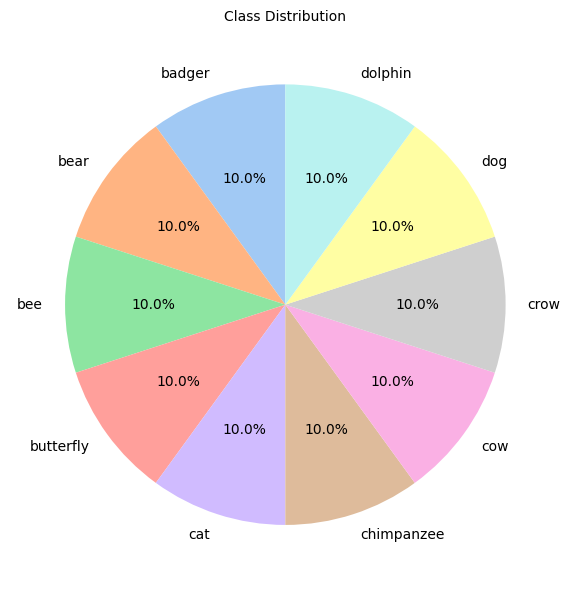

In [13]:
plt.figure(figsize=(14, 6))
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
classes_sorted = [x[0] for x in sorted_classes]
counts_sorted = [x[1] for x in sorted_classes]

plt.subplot(1, 2, 2)
plt.pie(counts_sorted, labels=classes_sorted, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Class Distribution', fontsize=10)

plt.tight_layout()
plt.show()


### 2. Image Properties Analysis

In [14]:
sample_size = min(1000, len(df))
sample_indices = np.random.choice(len(df), sample_size, replace=False)
sample_paths = df.iloc[sample_indices]

widths = []
heights = []
aspect_ratios = []
file_sizes = []
modes = []

print(f"\nAnalyzing {sample_size} random images...")

for idx, row in sample_paths.iterrows():
    try:
        img = Image.open(row['path'])
        width, height = img.size
        widths.append(width)
        heights.append(height)
        aspect_ratios.append(width / height)
        file_sizes.append(os.path.getsize(row['path']) / 1024)
        modes.append(img.mode)
        img.close()
    except Exception as e:
        print(f"Error reading {row['path']}: {e}")


Analyzing 600 random images...


In [15]:
print(f"\nImage dimensions:")
print(f"  Width  - Mean: {np.mean(widths):.2f}, Median: {np.median(widths):.2f}, "
      f"Min: {np.min(widths)}, Max: {np.max(widths)}")
print(f"  Height - Mean: {np.mean(heights):.2f}, Median: {np.median(heights):.2f}, "
      f"Min: {np.min(heights)}, Max: {np.max(heights)}")
print(f"  Aspect Ratio - Mean: {np.mean(aspect_ratios):.2f}, "
      f"Min: {np.min(aspect_ratios):.2f}, Max: {np.max(aspect_ratios):.2f}")

print(f"\nFile sizes:")
print(f"  Mean: {np.mean(file_sizes):.2f} KB")
print(f"  Median: {np.median(file_sizes):.2f} KB")
print(f"  Min: {np.min(file_sizes):.2f} KB, Max: {np.max(file_sizes):.2f} KB")

print(f"\nColor modes:")
mode_counts = Counter(modes)
for mode, count in mode_counts.most_common():
    print(f"  {mode}: {count} images ({count/len(modes)*100:.1f}%)")


Image dimensions:
  Width  - Mean: 814.22, Median: 400.00, Min: 178, Max: 4458
  Height - Mean: 574.21, Median: 311.00, Min: 129, Max: 3343
  Aspect Ratio - Mean: 1.50, Min: 0.56, Max: 3.02

File sizes:
  Mean: 123.50 KB
  Median: 25.37 KB
  Min: 3.31 KB, Max: 1892.13 KB

Color modes:
  RGB: 600 images (100.0%)


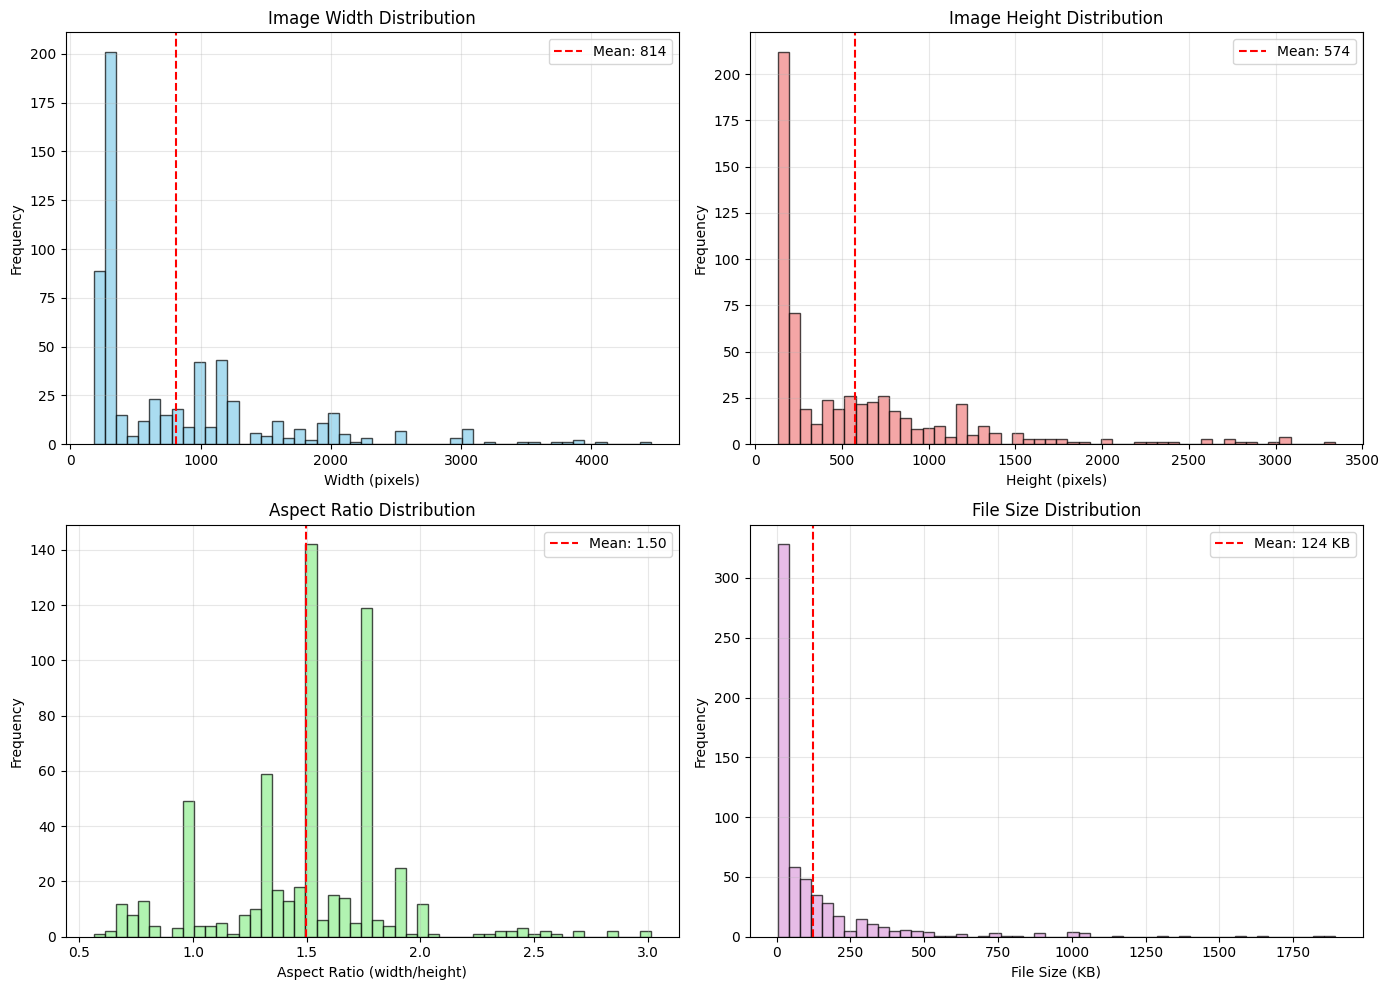

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(widths, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(np.mean(widths), color='red', linestyle='--',
                    label=f'Mean: {np.mean(widths):.0f}')
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Image Width Distribution')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(heights, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(np.mean(heights), color='red', linestyle='--',
                    label=f'Mean: {np.mean(heights):.0f}')
axes[0, 1].set_xlabel('Height (pixels)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Image Height Distribution')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

axes[1, 0].hist(aspect_ratios, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(np.mean(aspect_ratios), color='red', linestyle='--',
                    label=f'Mean: {np.mean(aspect_ratios):.2f}')
axes[1, 0].set_xlabel('Aspect Ratio (width/height)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Aspect Ratio Distribution')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

axes[1, 1].hist(file_sizes, bins=50, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(np.mean(file_sizes), color='red', linestyle='--',
                    label=f'Mean: {np.mean(file_sizes):.0f} KB')
axes[1, 1].set_xlabel('File Size (KB)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('File Size Distribution')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

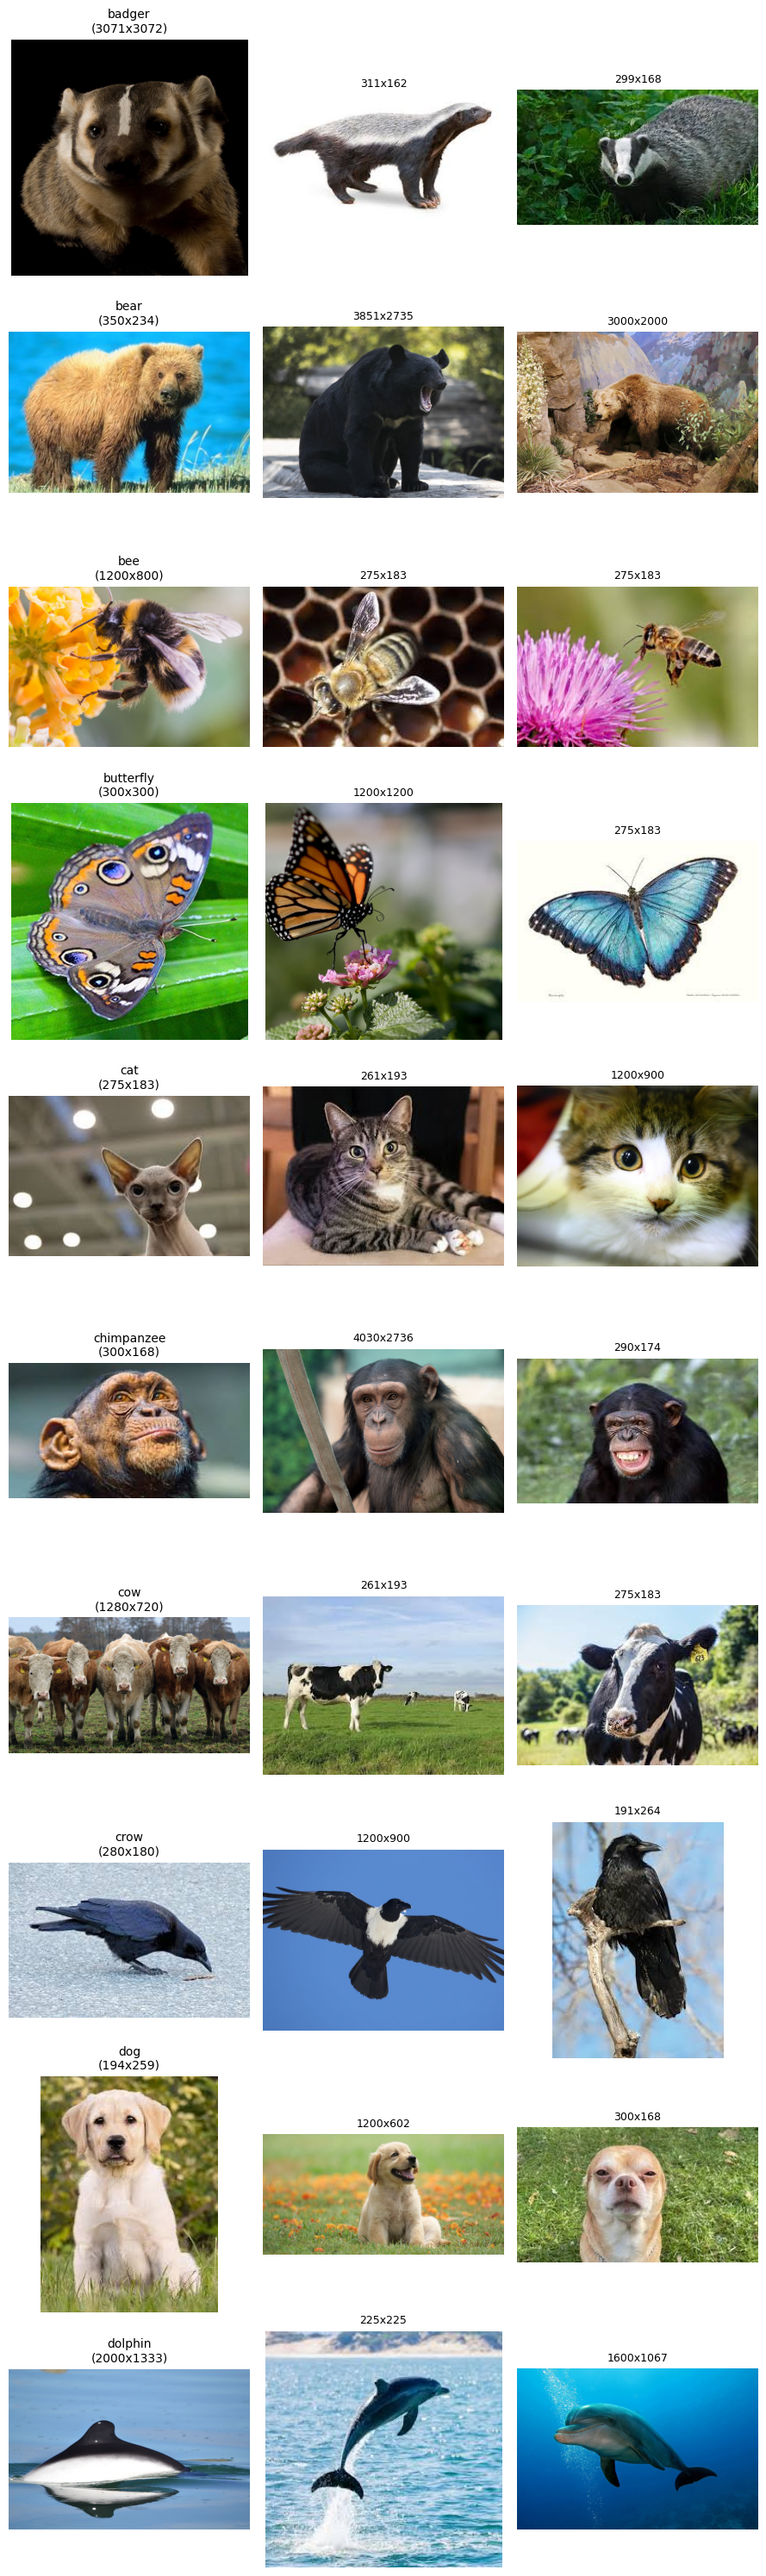

In [22]:
n_samples = 3  # Number of samples per class
n_classes = len(classes)

fig, axes = plt.subplots(n_classes, n_samples, figsize=(9, 3 * n_classes))

for i, class_name in enumerate(classes):
    class_images = df[df['class'] == class_name]['path'].values
    sample_images = np.random.choice(class_images,
                                     min(n_samples, len(class_images)),
                                     replace=False)

    for j, img_path in enumerate(sample_images):
        try:
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(f"{class_name}\n({img.size[0]}x{img.size[1]})",
                                     fontsize=10)
            else:
                axes[i, j].set_title(f"{img.size[0]}x{img.size[1]}", fontsize=9)
            img.close()
        except Exception as e:
            axes[i, j].text(0.5, 0.5, 'Error loading',
                           ha='center', va='center', fontsize=8)
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()

### 3. Sample Images Visualization

### 4. Summary